Files already downloaded and verified
Files already downloaded and verified
[1,  1250] loss: 2.044
[1,  2500] loss: 1.788
[1,  3750] loss: 1.669
[1,  5000] loss: 1.584
[1,  6250] loss: 1.550
[1,  7500] loss: 1.480
[1,  8750] loss: 1.448
[1, 10000] loss: 1.409
[1, 11250] loss: 1.393
[1, 12500] loss: 1.361
Train accuracy =  51.71
Test accuracy =  50.71
[2,  1250] loss: 1.384
[2,  2500] loss: 1.322
[2,  3750] loss: 1.283
[2,  5000] loss: 1.289
[2,  6250] loss: 1.281
[2,  7500] loss: 1.283
[2,  8750] loss: 1.277
[2, 10000] loss: 1.269
[2, 11250] loss: 1.278
[2, 12500] loss: 1.237
Train accuracy =  54.346
Test accuracy =  52.96
[3,  1250] loss: 1.234
[3,  2500] loss: 1.195
[3,  3750] loss: 1.210
[3,  5000] loss: 1.222
[3,  6250] loss: 1.200
[3,  7500] loss: 1.204
[3,  8750] loss: 1.223
[3, 10000] loss: 1.210
[3, 11250] loss: 1.197
[3, 12500] loss: 1.190
Train accuracy =  58.266
Test accuracy =  57.74
[4,  1250] loss: 1.189
[4,  2500] loss: 1.169
[4,  3750] loss: 1.177
[4,  5000] loss: 1.144

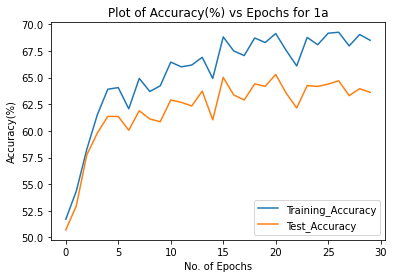

In [17]:
# Problem 1 c



import torch
import torch.nn as nn
import torch.nn.functional as F
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)




classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

############ Neural Network Class #########################
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        ####### Conv Nets #######
        self.conv1 = nn.Conv2d(3,100,5,bias=True)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(2*2*100,10,bias=True) 
        # self.fc2 = nn.Linear(100,10,bias=True)


    def forward(self, x):

          # flatten all dimensions except the batch dimension
        x = self.conv1(x)
        # x = self.fc1(x)
        x = F.relu(x)
        # x = F.max_pool2d(x,(2,2))
        x = F.max_pool2d(x,kernel_size=14,stride=14)
        x = torch.flatten(x, 1)
        x = self.fc1(x)

        # x = F.relu(self.fc1(x))
        # x = self.fc1(x)
        return x
###############################################################

net = Net()
criterion = nn.CrossEntropyLoss()
MoM = 0.9
Eta = 0.001
optimizer = optim.SGD(net.parameters(), lr=Eta, momentum=MoM)

Train_error = []
Test_error = []
Training_accuracy = []
EEPPOO = []

Test_accuracy = []

EE = []

############### Function for calculating the accuracy ###############
def accuracy(X):
  correct = 0
  total = 0
  with torch.no_grad():
      for data in X:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  return correct * 100 / total
 ####################################################################
# def error(X):

#       for i, data in enumerate(X, 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data
        

#         # zero the parameter gradients

 
#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)


#         # print statistics
#         running_loss += loss.item()
#       return running_loss / 50000

################# Training ##########################################

for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    correct = 0
    total = 0
    n = 0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        

        # zero the parameter gradients
        optimizer.zero_grad()
 
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1250 == 1249:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1250:.3f}')
            running_loss = 0.0

    train_accuracy = accuracy(trainloader)
    test_accuracy = accuracy(testloader)
    print("Train accuracy = ",train_accuracy)
    print("Test accuracy = ",test_accuracy)
    Training_accuracy.append(train_accuracy)
    Test_accuracy.append(test_accuracy)


    EEPPOO.append(epoch)



           ########### Check with test ################
    # correct2 = 0
    # total2 = 0
    # running_loss2

print("----------------------------------------------")
print("Momentum value = ",MoM)
print("Learning Rate = ",Eta)
plt.figure()
plt.plot(EEPPOO,Training_accuracy,label='Training_Accuracy')
plt.plot(EEPPOO,Test_accuracy,label='Test_Accuracy')
# plt.plot(EEPPOO,Train_error,label='Training_Loss')
# plt.plot(EEPPOO,Test_error,label='Test_loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy(%)")
plt.title("Plot of Accuracy(%) vs Epochs for 1a")
plt.legend()
# plt.xlabel("No. of Epochs")
# plt.ylabel("Accuracy")
# plt.title("Accuracy vs No. of Epochs (1a)")
#plt.legend()